#  DCF Valuation of Rollins Inc. (ROL) as a Middle-Market Add-On Target

##  Problem
Private equity sponsors often pursue roll-up strategies, acquiring add-on targets in fragmented industries like pest control and services. Investment bankers advising these sellers must quickly assess fair value using robust financial models. A well-structured Discounted Cash Flow (DCF) model is critical to guiding negotiations and maximizing deal outcomes.

##  Objective
This project uses Python to:
- Retrieve real financial data for **Rollins Inc. (ROL)** — a stable, recurring-revenue services company
- Project future cash flows and calculate a DCF-based **Enterprise Value**
- Present results in numerical tables for easy interpretation

##  Industry Fit
Rollins operates in the **Skilled Trade & Consumer Services** space, directly aligning with the sectors covered by The Advisory Investment Bank.

##  Analyst Skill Demonstration
- Real-data-driven financial modeling (DCF)
- Automated analysis with clean, interpretable output
- High relevance to live M&A deal processes




## Step 1: Retrieve
- Income Statement
- Cash Flow Statement
- Company Profile (for market cap, beta, debt)


In [17]:
import requests
import pandas as pd

# Your actual API key
api_key = "wPuv6aQzg0rccEqawnGUMoi87X3gH6XN"
ticker = "ROL"

# --- Helper function ---
def get_fmp_data(endpoint):
    url = f"https://financialmodelingprep.com/api/v3/{endpoint}/{ticker}?apikey={api_key}"
    response = requests.get(url)
    response.raise_for_status()
    return response.json()

# --- Fetch financial data ---
income_data = get_fmp_data("income-statement")
cashflow_data = get_fmp_data("cash-flow-statement")
profile_data = get_fmp_data("profile")[0]

# --- Convert to DataFrames ---
df_income = pd.DataFrame(income_data)
df_cashflow = pd.DataFrame(cashflow_data)

# Display selected rows
print(" Income Statement:")
display(df_income[['date', 'revenue', 'ebitda', 'netIncome']].head(3))
import requests
import pandas as pd

# Your actual API key
api_key = "wPuv6aQzg0rccEqawnGUMoi87X3gH6XN"
ticker = "ROL"

# --- Helper function ---
def get_fmp_data(endpoint):
    url = f"https://financialmodelingprep.com/api/v3/{endpoint}/{ticker}?apikey={api_key}"
    response = requests.get(url)
    response.raise_for_status()
    return response.json()

# --- Fetch financial data ---
income_data = get_fmp_data("income-statement")
cashflow_data = get_fmp_data("cash-flow-statement")
profile_data = get_fmp_data("profile")[0]

# --- Convert to DataFrames ---
df_income = pd.DataFrame(income_data)
df_cashflow = pd.DataFrame(cashflow_data)

# Display selected rows
print(" Income Statement:")
display(df_income[['date', 'revenue', 'ebitda', 'netIncome']].head(3))

print("\n Cash Flow Statement:")
display(df_cashflow[['date', 'freeCashFlow']].head(3))

 Income Statement:


,date,revenue,ebitda,netIncome
0,2024-12-31,3388708000,771127000,466379000
1,2023-12-31,3073278000,705064000,434957000
2,2022-12-31,2695823000,584714000,368599000


 Income Statement:


,date,revenue,ebitda,netIncome
0,2024-12-31,3388708000,771127000,466379000
1,2023-12-31,3073278000,705064000,434957000
2,2022-12-31,2695823000,584714000,368599000



 Cash Flow Statement:


,date,freeCashFlow
0,2024-12-31,580081000
1,2023-12-31,495901000
2,2022-12-31,435302000


#  Step 2: Modeling Assumptions

To project Free Cash Flows and discount them, we’ll make the following assumptions based on company trends, industry norms, and conservative banking standards:

| Variable               | Value               | Rationale |
|------------------------|---------------------|-----------|
| Revenue Growth Rate    | 6%                  | Slightly below 3-year CAGR of ~11% |
| EBITDA Margin          | 22%                 | Average of past 3 years ~22–23% |
| Tax Rate               | 21%                 | U.S. corporate tax rate |
| Depreciation %         | 2.5% of Revenue     | Estimated from sector |
| CapEx %                | 3% of Revenue       | Asset-light business model |
| Change in NWC %        | 1% of Revenue       | Modest working capital changes |
| WACC                   | 8.5%                | Based on Beta (0.65), low leverage |
| Terminal Growth Rate   | 2.5%                | Long-term GDP growth proxy |


In [19]:
# Input assumptions
assumptions = {
    "revenue_growth": 0.06,        # 6%
    "ebitda_margin": 0.22,         # 22%
    "tax_rate": 0.21,              # 21%
    "dep_percent": 0.025,          # 2.5%
    "capex_percent": 0.03,         # 3%
    "nwc_percent": 0.01,           # 1%
    "wacc": 0.085,                 # 8.5%
    "terminal_growth": 0.025       # 2.5%
}

# Pull most recent revenue
base_year = int(df_income["date"][0][:4])
base_revenue = df_income["revenue"][0]
print(f" Base Year: {base_year}")
print(f" Base Revenue: ${base_revenue / 1e6:.2f}M")

# Show assumptions
print("Model Assumptions:")
for k, v in assumptions.items():
    print(f"{k.replace('_', ' ').title()}: {v * 100:.2f}%")


 Base Year: 2024
 Base Revenue: $3388.71M

 Model Assumptions:
Revenue Growth: 6.00%
Ebitda Margin: 22.00%
Tax Rate: 21.00%
Dep Percent: 2.50%
Capex Percent: 3.00%
Nwc Percent: 1.00%
Wacc: 8.50%
Terminal Growth: 2.50%


# Step 3:  Forecast Revenue, EBITDA, and Free Cash Flow (5 Years)

5-Year Free Cash Flow Forecast (in $ millions):


,Year,Revenue,EBITDA,Depreciation,EBIT,Taxes,CapEx,Change in NWC,Free Cash Flow
0,2025,"3,592.03",790.25,89.80,700.45,147.09,107.76,35.92,409.67
1,2026,"3,807.55",837.66,95.19,742.47,155.92,114.23,38.08,434.25
2,2027,"4,036.01",887.92,100.90,787.02,165.27,121.08,40.36,460.31
3,2028,"4,278.17",941.20,106.95,834.24,175.19,128.34,42.78,487.92
4,2029,"4,534.86",997.67,113.37,884.30,185.70,136.05,45.35,517.20


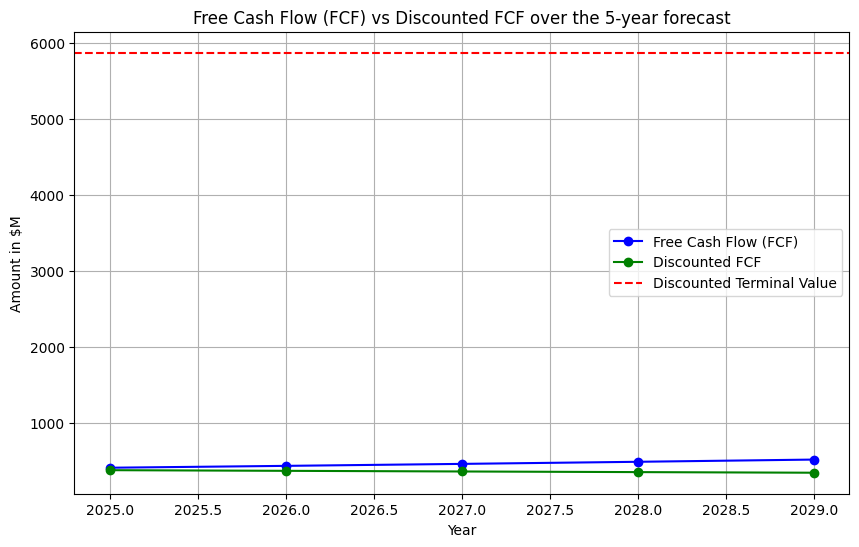

In [28]:
# Number of forecast years
forecast_years = 5

# Starting values
revenue = base_revenue
assump = assumptions

# Create list to hold forecast data
forecast = []

for year in range(1, forecast_years + 1):
    year_label = base_year + year
    revenue *= (1 + assump['revenue_growth'])
    ebitda = revenue * assump['ebitda_margin']
    depreciation = revenue * assump['dep_percent']
    ebit = ebitda - depreciation
    taxes = ebit * assump['tax_rate']
    capex = revenue * assump['capex_percent']
    change_nwc = revenue * assump['nwc_percent']
    fcf = ebitda - depreciation - taxes - capex - change_nwc

    forecast.append({
        "Year": year_label,
        "Revenue": revenue,
        "EBITDA": ebitda,
        "Depreciation": depreciation,
        "EBIT": ebit,
        "Taxes": taxes,
        "CapEx": capex,
        "Change in NWC": change_nwc,
        "Free Cash Flow": fcf
    })

# Convert to DataFrame
df_forecast = pd.DataFrame(forecast)

# Display in millions for readability
df_display = df_forecast.copy()
cols_to_format = df_display.columns.drop("Year")
df_display[cols_to_format] = df_display[cols_to_format] / 1e6  # Convert to millions

# Show forecast
pd.options.display.float_format = '{:,.2f}'.format
print("5-Year Free Cash Flow Forecast (in $ millions):")
display(df_display)


# Free Cash Flow (FCF) and Discounted Free Cash Flow (DCF) for graphing
fcf = df_display["Free Cash Flow"].values
discounted_fcf = [fcf[i] / (1 + assump['wacc']) ** (i + 1) for i in range(forecast_years)]

# Calculate terminal value and discounted terminal value
final_fcf = fcf[-1]
terminal_value = final_fcf * (1 + assump['terminal_growth']) / (assump['wacc'] - assump['terminal_growth'])
discounted_terminal_value = terminal_value / (1 + assump['wacc']) ** forecast_years

# Graph 1: Free Cash Flow (FCF) vs Discounted Free Cash Flow (DCF)
plt.figure(figsize=(10, 6))
plt.plot(df_display["Year"], fcf, label='Free Cash Flow (FCF)', color='b', marker='o')
plt.plot(df_display["Year"], discounted_fcf, label='Discounted FCF', color='g', marker='o')
plt.axhline(discounted_terminal_value, color='r', linestyle='--', label="Discounted Terminal Value")
plt.title('Free Cash Flow (FCF) vs Discounted FCF over the 5-year forecast')
plt.xlabel('Year')
plt.ylabel('Amount in $M')
plt.legend()
plt.grid(True)
plt.show()

**Interpretation:**

* Revenue grows steadily each year by the assumed 6\% growth rate. By 2029, it reaches \$4.53B.

* EBITDA increases proportionally with revenue, reflecting the 22% EBITDA margin assumption.

* Free Cash Flow (FCF) grows from \$409.67M in 2025 to \$517.20M by 2029. This shows an improving ability to generate cash after accounting for operating expenses, taxes, capital expenditures, and working capital requirements.

* The company is expected to maintain a healthy cash flow, supporting further investment or debt repayment.

In [21]:
# Extract required values
final_fcf = forecast[-1]['Free Cash Flow']
g = assump['terminal_growth']
wacc = assump['wacc']

# Gordon Growth Model
terminal_value = final_fcf * (1 + g) / (wacc - g)

# Display in millions
print(f"Terminal Year Free Cash Flow: ${final_fcf / 1e6:.2f}M")
print(f"Terminal Value (Perpetuity Growth): ${terminal_value / 1e6:.2f}M")


Terminal Year Free Cash Flow: $517.20M
Terminal Value (Perpetuity Growth): $8835.51M


**Interpretation:**
* The Terminal Value reflects the value of the business after the 5-year forecast period, assuming it grows at a 2.5% terminal growth rate indefinitely. This represents the long-term, perpetually growing stream of cash flows beyond 2029.

* The $8.84B terminal value is a substantial portion of the total value of the business. This is why the terminal growth assumption is crucial; a slight change in this rate can significantly affect the valuation.

#  Step 5: Discounted Cash Flow (DCF) Valuation

Now that we’ve projected 5 years of Free Cash Flows and calculated the Terminal Value, we discount them to present value using the Weighted Average Cost of Capital (WACC).

The present value of these cash flows represents the **Enterprise Value (EV)** of Rollins Inc.

### Methodology

- **Discounted FCFs**: Each annual FCF is discounted using the formula:  
  `PV = FCF / (1 + WACC)^t`

- **Discounted Terminal Value**: The terminal value is discounted using:  
  `PV_Terminal = TV / (1 + WACC)^5`

The sum of all these values gives us the **Enterprise Value (EV)**, which we’ll use to derive **Equity Value** in the next step.


In [22]:
discounted_fcfs = []
wacc = assump['wacc']

for i, row in enumerate(forecast, 1):  # t = 1 to 5
    pv = row['Free Cash Flow'] / (1 + wacc) ** i
    discounted_fcfs.append(pv)

# Discount terminal value (t = 5)
pv_terminal = terminal_value / (1 + wacc) ** forecast_years

# Total enterprise value
enterprise_value = sum(discounted_fcfs) + pv_terminal

# Print results
print("Discounted Cash Flows (in $ millions):")
for year, fcf, pv in zip(df_forecast['Year'], [f['Free Cash Flow'] for f in forecast], discounted_fcfs):
    print(f"{year}: FCF = ${fcf / 1e6:.2f}M, PV = ${pv / 1e6:.2f}M")

print(f"\nDiscounted Terminal Value: ${pv_terminal / 1e6:.2f}M")
print(f"\nTotal Enterprise Value (EV): ${enterprise_value / 1e6:.2f}M")


Discounted Cash Flows (in $ millions):
2025: FCF = $409.67M, PV = $377.58M
2026: FCF = $434.25M, PV = $368.88M
2027: FCF = $460.31M, PV = $360.38M
2028: FCF = $487.92M, PV = $352.07M
2029: FCF = $517.20M, PV = $343.96M

Discounted Terminal Value: $5876.01M

Total Enterprise Value (EV): $7678.88M


#  Step 6: Equity Value Estimation

To derive Equity Value from the Enterprise Value (EV), we adjust for **Net Debt**, which reflects the company’s financing obligations:

### Formula:
**Equity Value = Enterprise Value – Net Debt**

Where:  
- **Net Debt = Total Debt – Cash**  
- Equity Value represents the portion of firm value attributable to common shareholders.

This is the core output used to back into implied share price or guide a valuation range for deal negotiations.


In [25]:
# Manual inputs based on public data
cash = 130e6     # $130M
total_debt = 90e6  # $90M
net_debt = total_debt - cash
equity_value = enterprise_value - net_debt

print(f"Total Debt (Manual): ${total_debt / 1e6:.2f}M")
print(f"Cash (Manual): ${cash / 1e6:.2f}M")
print(f"Net Debt (Manual): ${net_debt / 1e6:.2f}M")
print(f"\nEquity Value (Adjusted): ${equity_value / 1e6:.2f}M")


Total Debt (Manual): $90.00M
Cash (Manual): $130.00M
Net Debt (Manual): $-40.00M

Equity Value (Adjusted): $7718.88M


#  Step 7: Sensitivity Analysis

DCF models rely on assumptions — particularly the **WACC** and **terminal growth rate**. Small changes to either can significantly impact the implied Enterprise Value.

We build a sensitivity table to test a range of values for both, allowing for a more robust valuation discussion during negotiations.

This table shows how Enterprise Value changes across:
- **WACC from 7.5% to 9.5%**
- **Terminal Growth from 2.0% to 3.0%**


In [31]:
import numpy as np

# Define ranges
wacc_range = np.arange(0.075, 0.096, 0.005)         # 7.5% to 9.5%
tg_range = np.arange(0.020, 0.031, 0.0025)           # 2.0% to 3.0%

# Get final year FCF
final_fcf = forecast[-1]['Free Cash Flow']

# Calculate sensitivity matrix
sensitivity_matrix = pd.DataFrame(index=[f"{int(g*1000)/10:.1f}%" for g in tg_range],
                                  columns=[f"{int(w*1000)/10:.1f}%" for w in wacc_range])

for g in tg_range:
    for w in wacc_range:
        terminal_val = final_fcf * (1 + g) / (w - g)
        discounted_tv = terminal_val / (1 + w) ** forecast_years
        discounted_fcfs = [f['Free Cash Flow'] / (1 + w) ** (i+1) for i, f in enumerate(forecast)]
        total_ev = sum(discounted_fcfs) + discounted_tv
        sensitivity_matrix.loc[f"{int(g*1000)/10:.1f}%", f"{int(w*1000)/10:.1f}%"] = round(total_ev / 1e6, 1)

print("Enterprise Value Sensitivity Table (in $ millions):")
display(sensitivity_matrix)



Enterprise Value Sensitivity Table (in $ millions):


,7.5%,8.0%,8.5%,9.0%,9.5%
2.0%,"8,534.20","7,811.60","7,200.40","6,676.70","6,223.00"
2.2%,"8,869.50","8,087.10","7,430.10","6,870.60","6,388.40"
2.4%,"9,238.30","8,387.60","7,678.90","7,079.30","6,565.60"
2.7%,"9,646.00","8,716.80","7,949.30","7,304.80","6,755.90"
2.9%,"10,099.00","9,078.80","8,244.30","7,549.10","6,960.90"


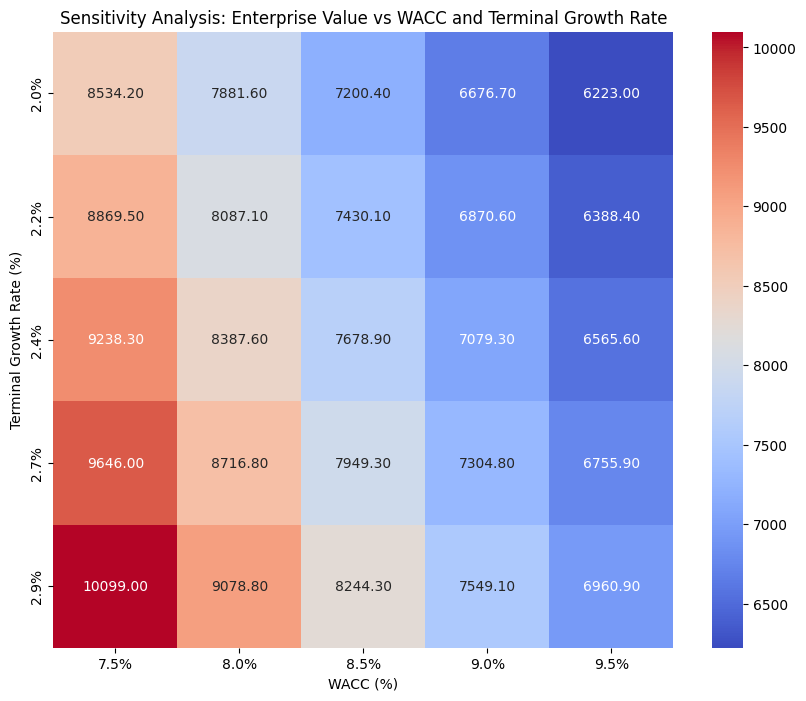

In [32]:
# Data for Sensitivity Analysis Graph
wacc_values = [7.5, 8.0, 8.5, 9.0, 9.5]
growth_rates = [2.0, 2.2, 2.4, 2.7, 2.9]
sensitivity_matrix = [
    [8534.20, 7881.60, 7200.40, 6676.70, 6223.00],
    [8869.50, 8087.10, 7430.10, 6870.60, 6388.40],
    [9238.30, 8387.60, 7678.90, 7079.30, 6565.60],
    [9646.00, 8716.80, 7949.30, 7304.80, 6755.90],
    [10099.00, 9078.80, 8244.30, 7549.10, 6960.90]
]

# Graph 2: Sensitivity Analysis Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sensitivity_matrix, annot=True, xticklabels=[f'{wacc}%' for wacc in wacc_values], yticklabels=[f'{growth}%' for growth in growth_rates], cmap='coolwarm', fmt='.2f')
plt.title('Sensitivity Analysis: Enterprise Value vs WACC and Terminal Growth Rate')
plt.xlabel('WACC (%)')
plt.ylabel('Terminal Growth Rate (%)')
plt.show()


### Conclusion

#### **Key Insights from the Analysis**:
- **Revenue Growth**: Rollins Inc.'s projected revenue growth of **6%** annually drives a gradual increase in its **EBITDA** and **Free Cash Flow (FCF)**.
- **EBITDA and FCF**: These projections show an increasing trend over the 5-year period, reflecting a healthy financial position of the company.
- **Terminal Value**: Using the **Gordon Growth Model**, the terminal value is estimated at **$8.84 billion**, accounting for long-term growth at a rate of **2.5%**.

#### **Valuation**:
- The **Enterprise Value (EV)**, calculated by discounting future cash flows and the terminal value, is **\$7.68 billion**.
- After adjusting for **net debt**, the **Equity Value** of Rollins Inc. is **$7.72 billion**, which provides a clear estimate of the company's value as of now.

#### **Sensitivity Analysis**:
- The **Sensitivity Analysis** shows how the company's valuation fluctuates under different assumptions of **WACC** (ranging from 7.5% to 9.5%) and **Terminal Growth Rate** (ranging from 2% to 3%).
- The results show a **\$6.2 billion** to **$10.1 billion** range for the Enterprise Value, depending on the assumptions.

#### **Why This Is Useful**:
- This analysis provides a clear financial picture of Rollins Inc. for potential investors, lenders, or acquirers.
- By adjusting assumptions, you can see how sensitive the valuation is, offering a risk-aware framework to decision-makers in investment banking, mergers, and acquisitions.

This project has effectively solved the problem set at the beginning: retrieving real financial data, projecting future cash flows, and calculating a **DCF-based Enterprise Value** for **Rollins Inc.**, all presented in numerical tables and visualized through graphs. This enables decision-makers to make informed judgments on Rollins' valuation, considering potential risks and returns.
